In [1]:
import pandas as pd
import numpy as np

In [4]:
fire=pd.read_csv("forestfires.csv")
fire.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [5]:
fire.shape

(517, 31)

In [6]:
fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [7]:
fire["size_category"].unique()

array(['small', 'large'], dtype=object)

In [11]:
pd.set_option('display.max_columns',None)

In [10]:
fire['month'].unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [20]:
fire1=fire.drop(fire.columns[11:30],axis=1)
fire1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [16]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [21]:
fire1["month"]=label.fit_transform(fire1["month"])
fire1["day"]=label.fit_transform(fire1["day"])
fire1["size_category"]=label.fit_transform(fire1["size_category"])

In [22]:
fire1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [23]:
fire1["day"].unique()

array([0, 5, 2, 3, 1, 6, 4])

In [29]:
x=fire1.iloc[:,:11]
x

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [30]:
y=fire1.iloc[:,11]
y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [33]:
x_train.shape,y_train.shape

((413, 11), (413,))

In [34]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [40]:
clf1 = SVC()
param_grid = [{'kernel':['rbf','poly','linear'],'gamma':[10,0.5],'C':[0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=2)
gsv.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=SVC(),
             param_grid=[{'C': [0.1, 0.001], 'gamma': [10, 0.5],
                          'kernel': ['rbf', 'poly', 'linear']}])

In [41]:
gsv.best_params_,gsv.best_score_

({'C': 0.1, 'gamma': 10, 'kernel': 'linear'}, 0.9782139674499319)

In [51]:
model = SVC(kernel='linear',gamma=10,C=0.1)
model.fit(x_train,y_train)

SVC(C=0.1, gamma=10, kernel='linear')

In [52]:
y_pred=model.predict(x_test)


In [53]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1])

In [57]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [55]:
acc=accuracy_score(y_pred,y_test)*100
acc

100.0

In [63]:
clf = SVC(C= 0.1, gamma = 10,kernel='linear')
clf.fit(x_train , y_train)
y_pred1 = clf.predict(x_test)
acc1 = accuracy_score(y_test, y_pred1) * 100
print("Accuracy =", acc1)
confusion_matrix(y_test, y_pred1)

Accuracy = 100.0


array([[23,  0],
       [ 0, 81]])

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns; 


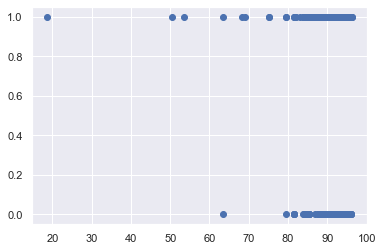

In [70]:
plt.scatter(x=fire1["FFMC"],y=fire1["size_category"],cmap='autumn')

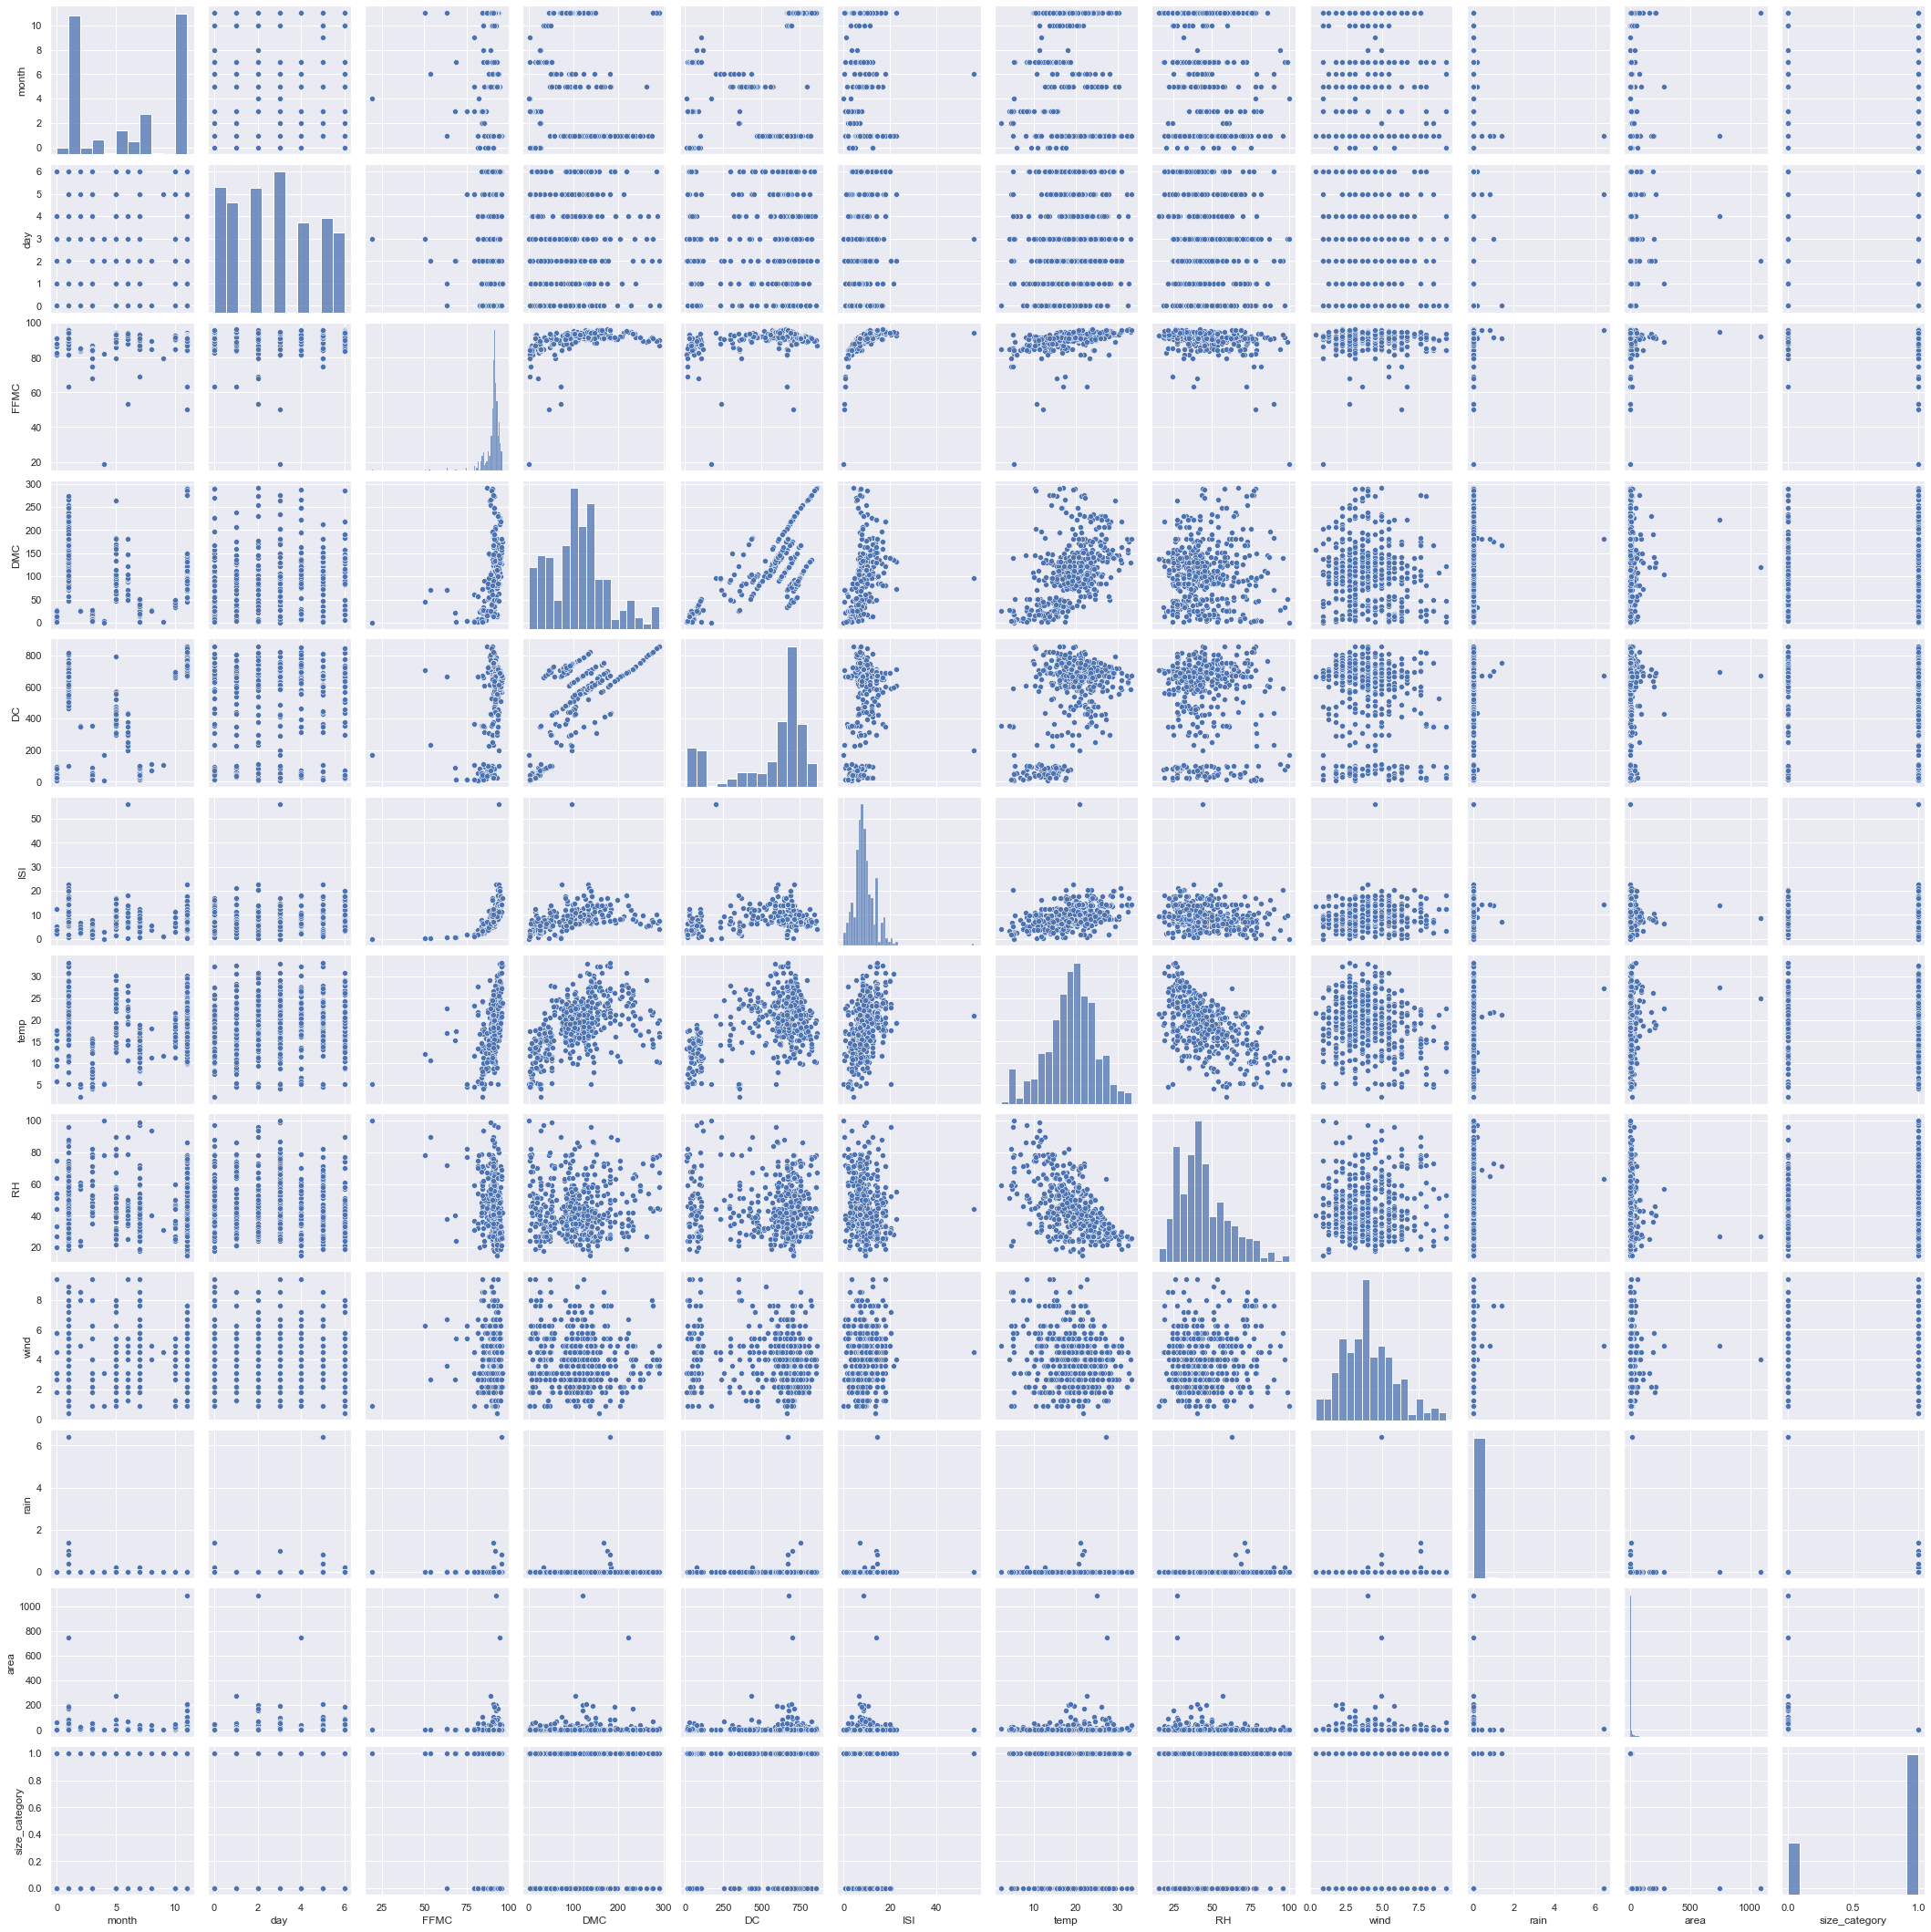

In [71]:
import seaborn as sns
sns.pairplot(fire1)

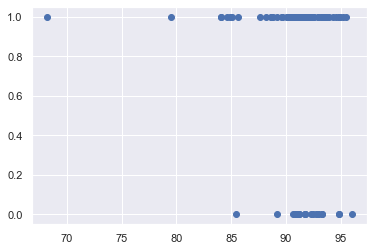

In [75]:
plt.scatter(x=x_test["FFMC"],y=y_test)